# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [3]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# Take a peek at the datasets
!head train.dat
!head test.dat

'head' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [25]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    result=0
    for i in range(len(array1)):
        result += array1[i] * array2[i]  
    return result
    


def sigmoid(x):
    #TODO: Return output of sigmoid function on x
    return (1/(1+math.exp(-x)))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    sd = sigmoid(dot_product(weight,instance))
    #TODO: return the output of the model 
    return sd

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    if (output(weights,instance)>=0.5):
        return 1
    else:
        return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    #Function to train perceptron: Fitting and learning the weights for each input
    #TODO: name this step
    #Initialize all weights to 0
    weights = [0] * (len(instances[0])-1)
    #Loop as many times as number of epochs
    for _ in range(epochs):
        #Loop over each instance
        for instance in instances:
            #TODO: name these steps
            #Feed-forwarding
            #Calculating sum of instances multiplied to their respective weights (Weighted sum)
            in_value = dot_product(weights, instance)
            #Applying Sigmoid Activation function to linearly separate the classes and get the output
            output = sigmoid(in_value)
            #Calculating loss/cost/error by the difference between predicted and ground truth value
            error = instance[-1] - output
            #TODO: name these steps
            #Backpropagation
            #Updating weights using gradient descent
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [26]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




Since the Output column in the dataset consists of 0 and 1 only indicating the 2 classes, so this forms a problem of Binary Classification wherein we need to make the two classes linearly separable. Hence, in the 'train_perceptron' function, the sigmoid function is applied to the dot product of weights and features to map the output within the 0 to 1 range. This ensures linear separability of the two classes represented by 0 and 1 in the dataset. The transformed output serves as a probability-like value indicating the likelihood of belonging to either class, aiding in prediction error computation during training for binary classification.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [78]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
        

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



In [61]:

import pandas as pd

instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate
data = []

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      accuracies.append(accuracy)
      data.append([len(pre_instances), epochs, lr, accuracy])
df = pd.DataFrame(data, columns=["Training Size", "Epochs", "Learning Rate", "Accuracy"])
print(df)

    Training Size  Epochs  Learning Rate  Accuracy
0              20       5          0.005      68.0
1              20      10          0.005      68.0
2              20      20          0.005      68.0
3              20      50          0.005      68.0
4              20     100          0.005      68.0
..            ...     ...            ...       ...
85            400       5          0.050      69.0
86            400      10          0.050      76.0
87            400      20          0.050      80.0
88            400      50          0.050      80.0
89            400     100          0.050      80.0

[90 rows x 4 columns]


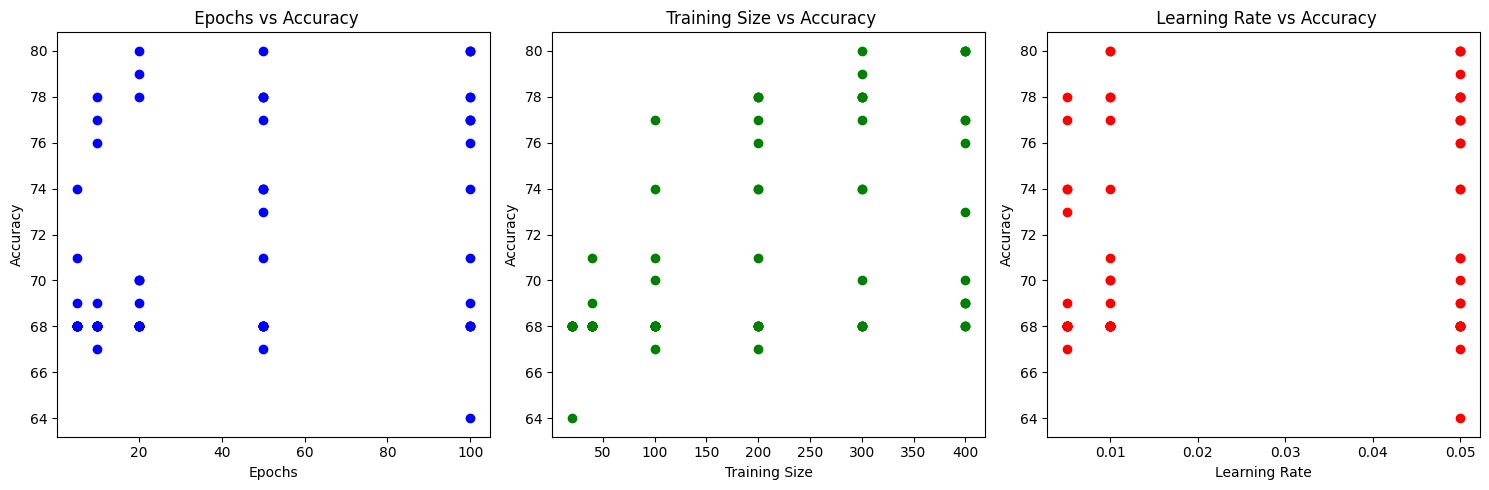

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['Epochs'], df['Accuracy'], color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(' Epochs vs Accuracy')

plt.subplot(1, 3, 2)
plt.scatter(df['Training Size'], df['Accuracy'], color='green')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title(' Training Size vs Accuracy')

plt.subplot(1, 3, 3)
plt.scatter(df['Learning Rate'], df['Accuracy'], color='red')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title(' Learning Rate vs Accuracy')

plt.tight_layout()
plt.show()


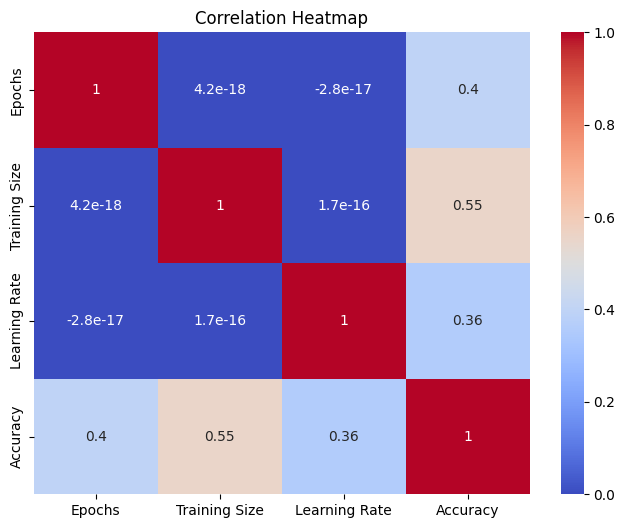

In [64]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df[['Epochs', 'Training Size', 'Learning Rate', 'Accuracy']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


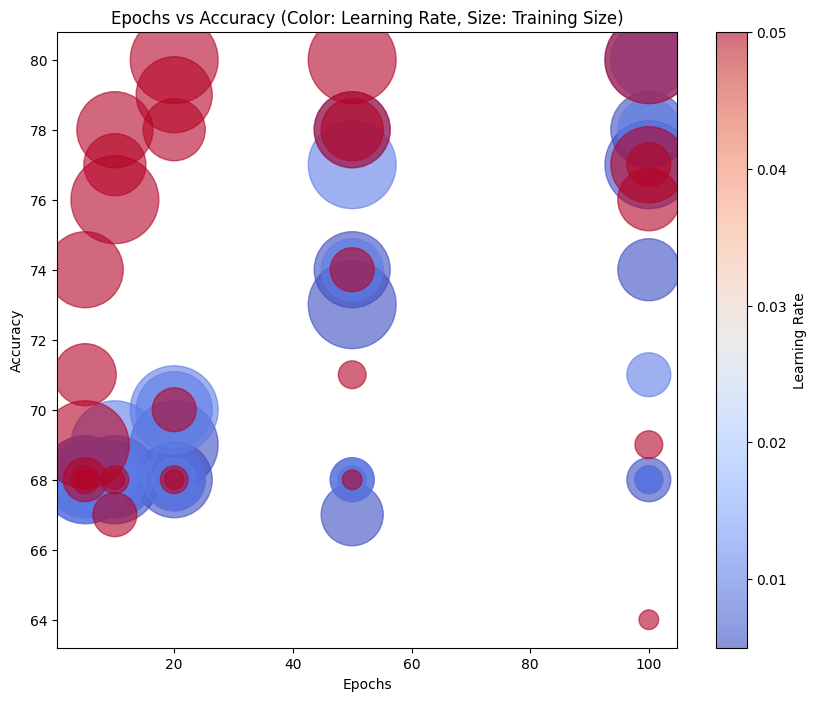

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Scatter plot
scatter = plt.scatter(df['Epochs'], df['Accuracy'], c=df['Learning Rate'], cmap='coolwarm', s=df['Training Size']*10, alpha=0.6)

# Customize labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy (Color: Learning Rate, Size: Training Size)')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Learning Rate')

plt.show()


A) Training with all the training dataset may not always lead to the highest accuracy with the test dataset as is evident from graph between Accuracy and Training Size. The performance of the model depends on various hyperparameters too like Learning Rate, Number of Epochs, etc. If the training dataset is diverse but small and the model is able to learn most of the patterns in data, then accuracy will be more on the test dataset. But if the train dataset is vast but not diverse and mostly redundant and contains noise then accuracy won't be high for test dataset. Therefore, it is important for the train dataset to be both vast and diverse. In some cases, using a smaller subset of the training data may prevent overfitting and result in better generalization to unseen data, thus leading to higher accuracy on the test dataset. While in other cases, more instances are needed to learn different patterns, to give high accuracy.

B) Here the training set is more but the accuracy decreases, this could be because of overfitting or the presence of noise in the data. Also, the learning rate is too low so the model may not converge effectively, resulting in lower accuracy.

C) Achieving accuracy above 80.0% with additional hyperparameters is influenced by various factors. The complexity of the problem, data quality and quantity, and algorithm selection are all crucial in determining model performance. While more hyperparameters provide flexibility in fine-tuning, they do not guarantee higher accuracy alone. Experimenting with different combinations of hyperparameters is essential to find the best configuration for accuracy improvement.

In a perceptron, the selection of activation function is crucial. Activation functions like step function, sigmoid or ReLU can also affect the accuracy. These nonlinear functions enable perceptrons to understand more complex patterns and capture nonlinear relationships in data. Regularization methods like L1 or L2 can also be useful in preventing overfitting in perceptrons. By penalizing large weights, regularization encourages simpler models that generalize better to new data. While various techniques can improve perceptron performance, achieving higher accuracy requires a careful balance of model complexity, data quality, and hyperparameter adjustments. Experimentation and refinement are essential to finding the best setup for a given
 task.

D) Training for more epochs without changing other hyperparameters may not always be beneficial. The ideal number of epochs depends on how the model converges and the dataset's complexity. Insufficient epochs can lead to underfitting where the model fails to capture the underlying patterns in the data, while excess epochs can cause overfitting where the model memorizes the training data and fails to generalize to unseen test data. Tuning the other hyperparameters and monitoring the model's performance on a test data set is crucial for better accuracy.